<script type="text/javascript" async
  src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-MML-AM_CHTML">
</script>

#### **Table of Content**
Static model
* [Free-energy](#free energy)
* [Mean-field assumption](#mean-field approximation)
* [Laplace approximation](#laplace approximation)
* [Optimisation](#optimisation)
* [Implementational consideration](#implementational consideration)
* [Example 1](#example1)
* [Example 2](#example2)
* [Example 3](#example3)

Appendix
* [Multivariate normal distribution](#appendix1)
* [Linearisation](#appendix3)

$\DeclareMathOperator{\tr}{tr}$

# Laplace approximation & free-energy

<a id="free energy"></a>
### § Free-energy

The Fristonian free-energy is

$$
F = U - S
$$

which comprises an energy term

$$
U = \left\langle \ln p(y, \vartheta|m) \right\rangle_q = \left\langle L \right\rangle_q
$$

and a (negative) Shannon entropy term

$$
S = \left\langle \ln q(\vartheta)\right\rangle
$$

<a id="mean-field approximation"></a>
### § Mean-field assumption

With mean-field approximation over the variational density, $q$

$$
q(\vartheta) = \prod_i q_i(\vartheta_i) = \prod_i q_i.
$$

Let us for now assume the following case

$$
q(\vartheta) = q_i(\vartheta_i) q_j(\vartheta_j) = q_i q_j,\;\;\; j = \backslash i
$$

and note that the following satisfies $\delta F / \delta q = 0$

$$
\begin{align}
    \ln q_i &= \ln Z_i + V(\vartheta_i) = \ln Z_i + \left\langle L(\vartheta)\right\rangle_{q_j}\\
    \end{align}.
$$

where $V_i=V(\vartheta_i)$ is known as the _variational energy_ and speask to the joint probability of data and parameters, $L$, expected under its Markov blanket, $q_j$.

<a id="laplace approximation"></a>
### § Laplace approximation

Under Laplace assumption, let us suppose that

$$
\begin{eqnarray*}
    q_i &=& N(\vartheta_i| \mu_i, \Sigma_i)\\
    \end{eqnarray*}
$$

are Gaussian, where

$$
\begin{eqnarray*}
    \Sigma_i &=& \left\langle (\vartheta_i - \mu_i)(\vartheta_i - \mu_i)^T\right\rangle
    \end{eqnarray*}
$$

is the covariance matrix.

Following the factorisation, we write

$$
\begin{eqnarray*}
    F &=& U - H\\
    U &=& \left\langle L(\vartheta)\right\rangle_{q_i q_j}\\
    H &=& \left\langle\ln q_i\right\rangle_{q_i} + \left\langle\ln q_j\right\rangle_{q_j}
    \end{eqnarray*}
$$

The (neg-)entropies are (see note [A.1](#appendix1))

$$
\begin{eqnarray*}
    H &=& -\frac{D_i}{2}(1 + \ln 2\pi) - 
        \frac 1 2\ln|\Sigma_i| - \frac{D_j}{2}(1 + \ln 2\pi) -\frac 1 2 \ln|\Sigma_j|\\
    &=& -\frac{D_i}{2}\ln 2\pi e -\frac 1 2\ln|\Sigma_i| - \frac{D_j}{2}\ln 2\pi e -\frac 1 2\ln|\Sigma_j|
    \end{eqnarray*}
$$

Further, with second-order truncation (dropping bilinear terms)

$$
\begin{eqnarray*}
    L(\vartheta) &\approx&
        L(\mu) + 
        (\vartheta_i - \mu_i)^T L^{(\vartheta_i)} + 
        (\vartheta_j - \mu_j)^T L^{(\vartheta_j)} \\
    && +
        \frac 1 2\left[
        (\vartheta_i - \mu_i)^T L^{(\vartheta_i\vartheta_i)} (\vartheta_i - \mu_i) + 
        (\vartheta_j - \mu_j)^T L^{(\vartheta_j\vartheta_j)} (\vartheta_j - \mu_j)
        \right]\\
    &=& L(\mu) + 
        (\vartheta_i - \mu_i)^T L^{(\vartheta_i)} + 
        (\vartheta_j - \mu_j)^T L^{(\vartheta_j)} \\
    && +
        \frac 1 2\left\{
        \tr\left[(\vartheta_i - \mu_i) (\vartheta_i - \mu_i)^T L^{(\vartheta_i\vartheta_i)}\right] +
        \tr\left[(\vartheta_j - \mu_j) (\vartheta_j - \mu_j)^T L^{(\vartheta_j\vartheta_j)}\right]
        \right\}
        \end{eqnarray*}
$$

where $L^{(\vartheta_i\vartheta_i)}$ denotes $\partial^2 L/\partial\vartheta_i\partial \vartheta_i$ evaluated at its mode $\mu$,

and write

$$
\begin{eqnarray*}
    U &=& L(\mu) +
        \frac 1 2 
        \left\{
        \tr\left[
        \langle (\vartheta_i - \mu_i) (\vartheta_i - \mu_i)^T\rangle L^{(\vartheta_i \vartheta_i)}
        \right] +
        \tr\left[
        \langle (\vartheta_j - \mu_j) (\vartheta_j - \mu_j)^T\rangle L^{(\vartheta_j \vartheta_j)}
        \right]
        \right\}\\
    &=& L(\mu) + \frac 1 2 \left\{
        \tr\left[\Sigma_i L^{(\vartheta_i \vartheta_i)}\right] + 
        \tr\left[\Sigma_j L^{(\vartheta_j \vartheta_j)}\right]
        \right\}
    \end{eqnarray*}
$$

Here, one uses the property: $a^TCa = \tr[aa^TC]$.

Thus, the free-energy becomes

$$
\DeclareMathOperator{\tr}{tr}
F = L(\mu) + \frac 1 2\left[
    \tr\left(\Sigma_i L^{(\vartheta_i \vartheta_i)}\right) + 
    \tr\left(\Sigma_j L^{(\vartheta_j \vartheta_j)}\right)
    \right] +
    \frac{D_i}{2}\ln 2\pi e +
    \frac 1 2\ln|\Sigma_i| + 
    \frac{D_j}{2}\ln 2\pi e +\frac 1 2\ln|\Sigma_j|
$$

Solve for $\Sigma_i$ (or just by examination through completing the square)

$$
\begin{eqnarray*}
    \delta F/\delta\Sigma_i &=& 0 =
        \frac 1 2 {L^{(\vartheta_i \vartheta_i)}}^T + \frac 1 2 \Sigma_i^{-1}\\
        \Sigma_i^{-1} &=& - {L^{(\vartheta_i \vartheta_i)}}^T = - L^{(\vartheta_i \vartheta_i)}
    \end{eqnarray*}
$$

<br>
Note that the same procedure can be applied to individual variational density to give

$$
\begin{eqnarray*}
    \ln q(\vartheta_i) &\approx& V(\vartheta_i)\\
    &=& \left\langle L(\vartheta_i, \mu_j) + 
        \frac 1 2 
        (\vartheta_j - \mu_j)^T 
        L^{(\vartheta_j \vartheta_j)}(\vartheta_i, \mu_j)
        (\vartheta_i - \mu_j)
        \right\rangle_{q_j}\\
    V(\vartheta_i, \mu_j) &=& L(\vartheta_i, \mu_j) +
        \frac 1 2 \tr\left(\Sigma_j L^{(\vartheta_j \vartheta_j)}\right)
    \end{eqnarray*}
$$

This is useful when optimse for variational mode $\mu_i$.
<br>

<a id="optimisation"></a>
### § Optimsation

To optimise the sufficient statistics for the variational density, $q$, under Laplace approximation, we only need to find their mean and covariance, which are illustrated in the preceding sections

$$
\begin{eqnarray*}
    \mu_i &=& \underset{\vartheta_i}{\operatorname{argmax}} V(\vartheta_i)\\
    \Sigma_i &=& - L(\mu)^{(\vartheta_j \vartheta_j)^{-1}}
    \end{eqnarray*}
$$

It is worth noting that the covariance is a function of its variational mode and does not depend on the mean-field approximation.

* Optimise for $\mu_i$

The update scheme should read 
$$
\DeclareMathOperator{\tr}{tr}
\begin{eqnarray*}
    V(\mu_i)^{(\vartheta_{i:k})} &=& L(\mu)^{(\vartheta_{i:k})} +
        \frac 1 2 \tr\left(\Sigma_j L^{(\vartheta_j \vartheta_j \vartheta_{i:k})}\right)\\
    V(\mu_i)^{(\vartheta_{i:k}\vartheta_{i:l})} &=&
        L(\mu)^{(\vartheta_{i:k}\vartheta_{i:l})} +
        \frac 1 2 \tr\left(\Sigma_j L^{(\vartheta_{j}\vartheta_{j}\vartheta_{i:k}\vartheta_{i:l})}\right)\\
    \Delta\mu_i &=& (\exp(tJ) - I)J^{-1}V(\mu_i)^{(\vartheta_i)}\\
    &\approx& -V(\mu_i)^{(\vartheta_{i}\vartheta_{i})^{-1}} V(\mu_i)^{(\vartheta_{i})}, \;\;\;\hbox{if }t \to \infty
    \end{eqnarray*}
$$

where superscript $(\vartheta_{i:k})$ denotes partial derivative to the $k$-th element of $\vartheta_i$. For detailed derivation see _[linearisation](#appendix3)_.

<a id="implementational consideration"></a>
### § Implementational consideration

Suppose one has parameter that factorises into $\vartheta = \{\theta, \varphi\}$

and let $\theta=(\theta_1, \theta_2)^T$ and $\varphi = (\varphi_1, \varphi_2)^T$

$$
\DeclareMathOperator{\tr}{tr}
\begin{eqnarray*}
    V^{(\varphi\varphi)} &=& \left(
        \begin{array}{cc}
            V^{(\varphi_1\varphi_1)} &
            V^{(\varphi_1\varphi_2)} \\
            V^{(\varphi_2\varphi_1)} &
            V^{(\varphi_2\varphi_2)} 
            \end{array}\right)\\
    &=& \left(
        \begin{array}{cc}
            L^{(\varphi_1\varphi_1)} &
            L^{(\varphi_1\varphi_2)} \\
            L^{(\varphi_2\varphi_1)} &
            L^{(\varphi_2\varphi_2)}
            \end{array}\right) +
        \frac{1}{2}\left(
        \begin{array}{cc}
            \tr\left[\Sigma_\theta L^{(\theta\theta\varphi_1\varphi_1)}\right] &
            \tr\left[\Sigma_\theta L^{(\theta\theta\varphi_1\varphi_2)}\right] \\
            \tr\left[\Sigma_\theta L^{(\theta\theta\varphi_2\varphi_1)}\right] &
            \tr\left[\Sigma_\theta L^{(\theta\theta\varphi_2\varphi_2)}\right]
            \end{array}\right)
    \end{eqnarray*}
$$

Unpack $L^{(\theta\theta\varphi_1\varphi_1)}$ in the second term

$$
\left(\begin{array}{cc}
    L^{(\theta_1\theta_1\varphi_1\varphi_1)} &
    L^{(\theta_1\theta_2\varphi_1\varphi_1)} \\
    L^{(\theta_2\theta_1\varphi_1\varphi_1)} &
    L^{(\theta_2\theta_2\varphi_1\varphi_1)}
    \end{array}\right)
$$

It is straightforward to show that, for instance, 
$\tr\left[\Sigma_\theta L^{(\theta\theta\varphi_1\varphi_2)}\right]$ 
is equivalent to $\Sigma^T\!\!\!:_\theta^T L\!\!:^{(\theta\theta)(\varphi_1\varphi_2)}$, 
where $\Sigma\!\!:$ denotes matrix vectorisation, 
and $\Sigma^T\!\!\!:$ stands for vectorisation along columns. 

Thus, $L\!\!:^{(\theta\theta)(\varphi\varphi)}$ becomes a matrix that reads

\begin{align}
    \left(\begin{array}{cc}
        L\!\!:^{(\theta\theta)(\varphi_1\varphi_1)} &
        L\!\!:^{(\theta\theta)(\varphi_1\varphi_2)} \\
        L\!\!:^{(\theta\theta)(\varphi_2\varphi_1)} &
        L\!\!:^{(\theta\theta)(\varphi_2\varphi_2)}
        \end{array}
        \right) = 
    \left(\begin{array}{cc}
        L^{(\theta_1\theta_1\varphi_1\varphi_1)} &
        L^{(\theta_1\theta_1\varphi_1\varphi_2)} \\
        L^{(\theta_2\theta_1\varphi_1\varphi_1)} &
        L^{(\theta_2\theta_1\varphi_1\varphi_2)} \\
        L^{(\theta_1\theta_2\varphi_1\varphi_1)} &
        L^{(\theta_1\theta_2\varphi_1\varphi_2)} \\
        L^{(\theta_2\theta_2\varphi_1\varphi_1)} &
        L^{(\theta_2\theta_2\varphi_1\varphi_2)} \\
        L^{(\theta_1\theta_1\varphi_2\varphi_1)} &
        L^{(\theta_1\theta_1\varphi_2\varphi_2)} \\
        L^{(\theta_2\theta_1\varphi_2\varphi_1)} &
        L^{(\theta_2\theta_1\varphi_2\varphi_2)} \\
        L^{(\theta_1\theta_2\varphi_2\varphi_1)} &
        L^{(\theta_1\theta_2\varphi_2\varphi_2)} \\
        L^{(\theta_2\theta_2\varphi_2\varphi_1)} &
        L^{(\theta_2\theta_2\varphi_2\varphi_2)} \\
        \end{array}
        \right)
    \end{align}

and one accordingly has

$$
V^{(\varphi\varphi)} = L^{(\varphi\varphi)} + \frac 1 2
    \left( I\otimes \Sigma^T\!\!\!:_\theta\right)^T
    L\!\!:^{(\theta\theta)(\varphi\varphi)}
$$

The same procedure can be repeated for $V^{(\theta\theta)}, V^{(\varphi)}$ and $V^{(\theta)}$ to give

$$
\begin{eqnarray*}
    V^{(\theta\theta)} &= L^{(\theta\theta)}& +
        \frac 1 2
        \left( I\otimes \Sigma^T\!\!\!:_\varphi\right)^T
        L\!\!:^{(\varphi\varphi)(\theta\theta)}\\
    V^{(\varphi)} &= L^{(\varphi)}& +
        \frac 1 2
        \left( I\otimes \Sigma^T\!\!\!:_\theta\right)^T
        L\!\!:^{(\theta\theta)(\varphi)}\\
    V^{(\theta)} &= L^{(\theta)}& +
        \frac 1 2
        \left( I\otimes \Sigma^T\!\!\!:_\varphi\right)^T
        L\!\!:^{(\varphi\varphi)(\theta)}\\
    \end{eqnarray*}
$$

<a id="example1"></a>
### § Example 1

In this example we will attempt to optimise the following objective function using the updating scheme above.

$
L(u, v) = -\frac{1}{16} (u - \frac{1}{8}v^2)^2 - \frac{1}{128} (v^2 - 2)^2
$

In [1]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
from IPython import display
import time
%matplotlib inline 

In [2]:
import theano
import theano.tensor as T

print("Theano version: ", theano.__version__)

Using gpu device 0: Tesla K40c (CNMeM is enabled with initial size: 90.0% of memory, cuDNN 4007)


Theano version:  0.8.2


In [3]:
c0 = [1. / 16, 1. / 8, 1. / 128]
u, v = T.vectors(2)
Su, Sv = T.matrices(2)  # this is not necessary, only for the purpose of tutorial

L = (-c0[0] * (u - c0[1] * v ** 2) ** 2 - c0[2] * (v ** 2 - 2) ** 2)[0]

In [4]:
fSu, fSv = Su.flatten(1), Sv.flatten(1)

Lu = T.jacobian(L, u)
Lv = T.jacobian(L, v)

Luu = T.hessian(L, u).flatten(1)
Lvv = T.hessian(L, v).flatten(1)

Luuv = T.join(0, [T.jacobian(Luu[i], v) for i in range(1)])
Lvvu = T.join(0, [T.jacobian(Lvv[i], u) for i in range(1)])

Luuvv = T.join(0, [T.hessian(Luu[i], v).flatten(1) for i in range(1)])
Lvvuu = T.join(0, [T.hessian(Lvv[i], u).flatten(1) for i in range(1)])

Uu = T.join(0, [T.sum(fSv * Lvvu[:, i]) for i in range(1)])
Uv = T.join(0, [T.sum(fSu * Luuv[:, i]) for i in range(1)])

Uuu = T.join(0, [T.sum(fSv * Lvvuu[:, i]) for i in range(1)])
Uvv = T.join(0, [T.sum(fSu * Luuvv[:, i]) for i in range(1)])

Vu = Lu + 0.5 * Uu
Vv = Lv + 0.5 * Uv

Vuu = (Luu + 0.5 * Uuu).reshape((1, 1))
Vvv = (Lvv + 0.5 * Uvv).reshape((1, 1))

F = L + 0.5 * (Su.dot(Luu) + Sv.dot(Lvv)) + T.log(T.nlinalg.det(Su)) + T.log(T.nlinalg.det(Sv))


du = -(T.nlinalg.pinv(Vuu).dot(Vu))
dv = -(T.nlinalg.pinv(Vvv).dot(Vv))

# alternatively
# du = (T.slinalg.expm(Vuu) - 1).dot(T.nlinalg.pinv(Vuu).dot(Vu))
# dv = (T.slinalg.expm(Vvv) - 1).dot(T.nlinalg.pinv(Vvv).dot(Vv))

Cu = - T.nlinalg.pinv(Luu.reshape((1, 1)))
Cv = - T.nlinalg.pinv(Lvv.reshape((1, 1)))

In [5]:
update = theano.function([u, v, Su, Sv], [du, dv, Cu, Cv], allow_input_downcast=True)
elb = theano.function([u, v, Su, Sv], F, allow_input_downcast=True)

In [6]:
tu, tv = 1., 1.  # delta_u, delta_v

u0, v0, Su0, Sv0 = np.array([1.]), np.array([1.]), np.array([[1.]]), np.array([[1.]])
tCu, tCv = Su0, Sv0
tol = 0.001

Converged.
u:  [ 0.99525321] v:  [ 1.63549357] Cu:  [[ 8.]] Cv:  [[ 5.28174448]]


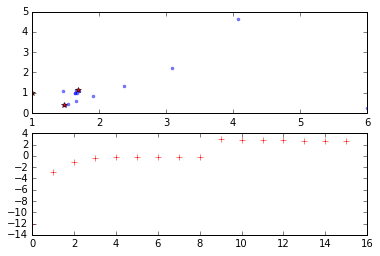

In [7]:
plt.figure()
plt.hold(True)

step = 0
for maxM in range(256):
    plt.subplot(211)
    plt.plot(v0, u0, 'r*', alpha=1)
    for maxN in range(256):
        tu, tv, tCu, tCv = update(u0, v0, Su0, Sv0)
        u0 += tu
        v0 += tv
        
        plt.subplot(211)
        plt.plot(v0, u0, 'b.', alpha=.5);
        plt.subplot(212)
        plt.plot(step, elb(u0, v0, Su0, Sv0), 'r+');
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.)
        step += 1
        if (tu ** 2) < tol and (tv ** 2) < tol: break
    if np.sum((Su0 - tCu) ** 2) < tol and np.sum((Sv0 - tCv) ** 2) < tol: break
    Su0, Sv0 = tCu, tCv
print("Converged.")
print("u: ", u0, "v: ", v0, "Cu: ", Su0, "Cv: ", Sv0)

<a id="example2"></a>
### § Example 2

Instead of writing multiple lines of code, in this example we create a function `vilaps()` which allows us to reuse the updating scheme given different model/objective function. 

This function uses Theano to generate a compiled updating scheme, with optional observation `y` and hyperprior `hp` arguments.

In [8]:
import scipy.stats as stat
import numpy as np
import theano
import functools
import theano.tensor as T

print("Theano version: ", theano.__version__)

Theano version:  0.8.2


In [9]:
def vilaps(L, b, bdims, y=None, hp=None):
    
    def _jac_(*args, **kwargs):
        return T.jacobian(*args, disconnected_inputs='warn', **kwargs)
    
    def _hes_(*args, **kwargs):
        return T.hessian(*args, disconnected_inputs='warn', **kwargs)
    
    assert len(b) == len(bdims)
    
    if y is None:
        y = []
    else:
        y = [y]
       
    if hp is None:
        hp = []
    
    mfp = len(bdims)
    
    Li  = [_jac_(L, b[i]) for i in range(mfp)]
    Lii = [_hes_(L, b[i]).flatten(1) for i in range(mfp)]
       
    Liij  = [[T.join(0, [_jac_(Lii[i][k], b[j]) for k in range(bdims[i] ** 2)])
              for j in range(mfp)]
             for i in range(mfp)]
    Liijj = [[T.join(0, [_hes_(Lii[i][k], b[j]).flatten(1) for k in range(bdims[i] ** 2)])
              for j in range(mfp)]
             for i in range(mfp)]
    
    Ci  = [- T.nlinalg.pinv(Lii[i].reshape((bdims[i], bdims[i]))) for i in range(mfp)]
    fCi = [Ci[i].flatten(1) for i in range(mfp)]
    
    Uj = [[T.join(0, [T.sum(fCi[j] * Liij[j][i][:, k])  for k in range(bdims[i])])
           for j in range(mfp)
           if j != i]
          for i in range(mfp)]
    
    Ujj = [[T.join(0, [T.sum(fCi[j] * Liijj[j][i][:, k]) for k in range(bdims[i] ** 2)])
            for j in range(mfp)
            if j != i]
           for i in range(mfp)]
    
    Vi  = [Li[i] + 0.5 * functools.reduce(lambda x, y: x + y, Uj[i]) for i in range(mfp)]
    Vii = [(Lii[i] + 0.5 * functools.reduce(lambda x, y: x + y, Ujj[i])).reshape((bdims[i], bdims[i]))
           for i in range(mfp)]
    
    bGN = [-T.nlinalg.pinv(Vii[i]).dot(Vi[i]) for i in range(mfp)]
    bLM = [(T.slinalg.expm(Vii[i]) - 1).dot(T.nlinalg.pinv(Vii[i])).dot(Vi[i]) for i in range(mfp)]

    F = L
    for i in range(mfp):
        F += 0.5 * T.sum(fCi[i] * Lii[i] + T.log(T.nlinalg.det(Ci[i])))
        
    viupdate = theano.function(
        b + hp + y,
        bGN + bLM + Ci + [F],
        allow_input_downcast=True)
    
    return viupdate

This time we try to invert the following model that generates our observation $y$

$
\begin{align}
    p(y|\mu, \tau) &= N(y|\mu, \tau^{-1})\\
    p(\mu|\tau) &= N(\mu|\mu_0, (\lambda_0\tau)^{-1})\\
    p(\tau) &= \hbox{Ga}(\tau|a_0, b_0)
    \end{align}
$

where we assume mean-field approximation

$
q(\mu,\tau) = q(\mu)q(\tau)
$

and Laplace assumption.

In [10]:
hv = [9., 3.]
hu = [5., 2.]
rngv = stat.gamma(a=hv[0], scale=hv[1])
N = 1000

Y = np.zeros((N, 1))
U = np.zeros(N)
V = np.zeros(N)

for s in range(N):
    v = rngv.rvs()
    rngu = stat.norm(loc=hu[0], scale=np.sqrt(1 / (hu[1] * v)))
    u = rngu.rvs()
    Y[s, :] = stat.norm(loc=u, scale=1 / v).rvs()
    U[s] = u
    V[s] = v


In [11]:
y = T.matrix()
u, v, pu, pv = T.vectors(4)

L1 = T.sum(-0.5 * (y - u).dot(T.nlinalg.matrix_inverse(T.diag(v))) * (y - u)) -\
    0.5 * ((u - pu[0]).dot(T.nlinalg.matrix_inverse(T.diag(pu[1] * v)))).dot(u - pu[0]) -\
    T.gammaln(pv[0]) * pv[1] ** pv[0] + (pv[0] - 1) * T.log(v) - v / pv[1]
L1 = T.sum(L1)

In [12]:
b = [u, v]
hp = [pu, pv]
bdims = [1, 1]

# The line below generates an warning (or raise an DisconnectedInput exception if the disconnected_input flag
# is otherwise not set for T.jacobian and T.hessian). 
# This happens when 1) AD takes a derivative of a constant; or 2) you ask for jacobian/hessian over some 
# subtensor of your symbols. When asking for a subtensor, theano creates a new symbol which is not included 
# in your computation graph, this is when theano complains about DisconnectedInput.
# Note that methods such as flatten also creates new symbol.
# 
# This illegal:
#    u = T.vector()
#    L = T.sum(u)
#    Lu = T.jacobian(L, u[0])
# This is legal:
#    u = T.vector()
#    L = u[0] * u[1]
#    Lu = T.jacobian(L, u)

viu = vilaps(L1, b, bdims, y, hp);

/home/yen/env/p34/lib/python3.4/site-packages/theano/gradient.py:545: UserWarning: grad method was asked to compute the gradient with respect to a variable that is not part of the computational graph of the cost, or is used only by a non-differentiable operator: <TensorType(float32, vector)>
  handle_disconnected(elem)
/home/yen/env/p34/lib/python3.4/site-packages/theano/gradient.py:571: UserWarning: grad method was asked to compute the gradient with respect to a variable that is not part of the computational graph of the cost, or is used only by a non-differentiable operator: <DisconnectedType>
  handle_disconnected(rval[i])


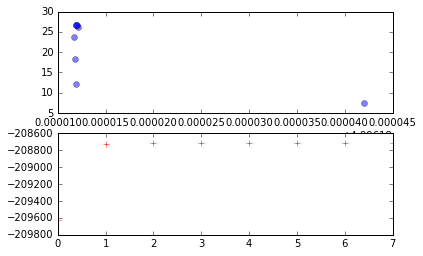

In [13]:
u0, v0 = np.array([2.]), np.array([5.])
tol = 0.0001

plt.figure()
for step in range(256):
    gnu, gnv, lmu, lmv, Cu, Cv, FE = viu(u0, v0, hu, hv, Y)
    tu, tv = gnu, gnv
    u0 += tu
    v0 += tv
    plt.subplot(211)
    plt.plot(u0, v0, 'bo', alpha=.5)
    plt.subplot(212)
    plt.plot(step, FE, 'r+')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if np.square(tu) < tol and np.square(tv) < tol: break

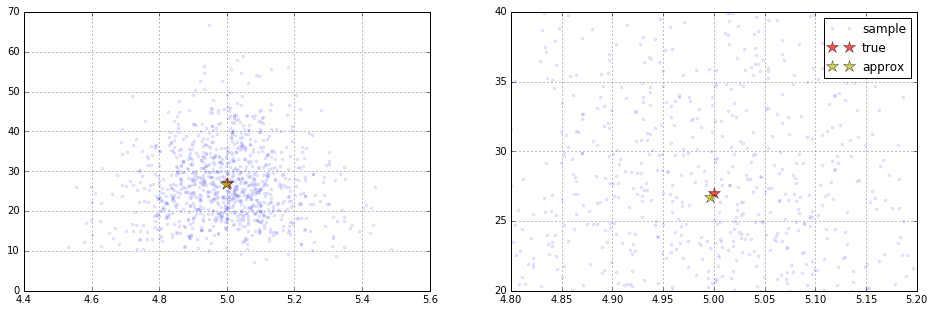

In [14]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.plot(U, V, 'b.', alpha=.1);
plt.plot(hu[0], np.prod(hv), 'r*', markersize=12, alpha=.7);
plt.plot(u0, v0, 'y*', markersize=12, alpha=.7);
plt.grid(True)
plt.subplot(122)
plt.plot(U, V, 'b.', alpha=.1);
plt.plot(hu[0], np.prod(hv), 'r*', markersize=12, alpha=.7);
plt.plot(u0, v0, 'y*', markersize=12, alpha=.7);
plt.grid(True)
plt.xlim([4.8, 5.2])
plt.ylim([20, 40])
plt.legend(["sample", "true", "approx"]);

<a id="example3"></a>
### § Example 3

This example repeats [Example 1](#example1) using the function we just wrote.

In [15]:
c0 = [1. / 16, 1. / 8, 1. / 128]
u, v = T.vectors(2)
L2 = (-c0[0] * (u - c0[1] * v ** 2) ** 2 - c0[2] * (v ** 2 - 2) ** 2)[0]

viu = vilaps(L2, [u, v], [1, 1], hp=None, y=None)

[ 0.99625185] [ 1.63277395]


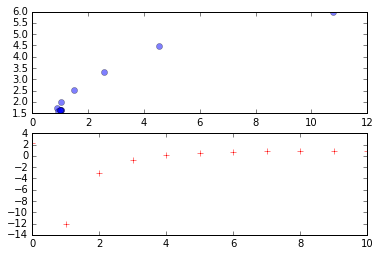

In [16]:
plt.figure()
u0 = [1.]
v0 = [1.]
tol = 0.0001

for step in range(256):
    gnu, gnv, lmu, lmv, Cu, Cv, FE = viu(u0, v0)
    tu, tv = gnu, gnv
    u0 += tu
    v0 += tv
    plt.subplot(211)
    plt.plot(u0, v0, 'bo', alpha=.5)
    plt.subplot(212)
    plt.plot(step, FE, 'r+')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if np.all(np.square([tu, tv]) < tol): break
print(u0, v0)

<a id="appendix1"></a>
### A.1 Multivariate normal distribution

Say $\pmb x \sim N(\pmb\mu, \pmb\Lambda^{-1})$

Then,

$
\ln p(\pmb x) = -\frac D 2\ln 2\pi - \frac 1 2 \ln|\pmb\Lambda^{-1}| - \frac 1 2 (\pmb x-\pmb\mu)^T\pmb\Lambda(\pmb x-\pmb\mu)
$

$
H(\pmb x) = \langle -\ln \pmb x\rangle = \frac D 2\ln 2\pi e + \frac 1 2 \ln |\pmb\Lambda^{-1}|
$

$
D = \dim(\pmb x)
$

<a id="appendix3"></a>
### A.2 Linearisation

The following derives a local linearisation of a dynamical system, proposed by Ozaki (1992).


Suppose we have a stochastic dynamical system with a continuous time Gaussian white noize $n(t)$.

$$
\begin{equation}
\dot{y}(t) = f(y(t))) + n(t) \tag{1}
\end{equation}
$$
 
At first, we approximate the equation by a Gaussian process,

$$
\begin{equation}
\dot{y}(t) = K_ty(t) + n(t) \tag{2}
\end{equation}
$$

with some appropriate $K_t$ on a small interval $[t, t+\Delta t)$.

From the assumption that the Jacobian of the linear part of $(2)$ over each interval $[t, t+\Delta t)$ is given by the Jacobian $J_t = \frac{\partial f(y)}{\partial y}$ at $y = y_t$ of the original dynamical system, we have the following equation by using  chain rule,

$$
\begin{eqnarray*}
\ddot{y}(s) &=& \frac{d\dot{y}(s)}{ds} \\
&=& \frac{\partial f(y)}{\partial y}\frac{\partial y}{\partial s} \\ 
&=& J_t\dot{y}(s) \tag{3}
\end{eqnarray*}
$$

for $t \leq s \leq t + \Delta t$.

By integrating (3) on $[t, t + \tau)(0 \leq \tau < \Delta t)$ we have

$$
\begin{eqnarray*}
\dot{y}(t + \tau) &=& \exp(J_t\tau)\dot{y}(t) \\
&=& \exp(J_t\tau)f(y(t)) \tag{4}
\end{eqnarray*}
$$

Integrating the equation $(4)$ again with respect to $\tau$  on $[0, \Delta t)$  utilizing the method of integration by parts,
finally, we get the following equation which gives the value of $y(t+\Delta t)$ as a function of $y(t)$.

$$
\begin{equation}
y(t + \Delta t) = y(t) + J_t^{-1}\{\exp(J_t\Delta t) - 1\}f(y(t))\tag{5}
\end{equation}
$$

* Ozaki T (1992) "A bridge between nonlinear time series models and nonlinear stochastic dynamical systems: a local linearization approach", Statistics Sinica 2, 1, 113-135.